In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Logistic Regression

## Model

In [2]:
diabetes = pd.read_csv('C:/Users/umutk/Documents/python_calismalar/diabetes.csv')
df = diabetes.copy()
print('Is there any NA value :', df.isna().any().any())

Is there any NA value : False


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


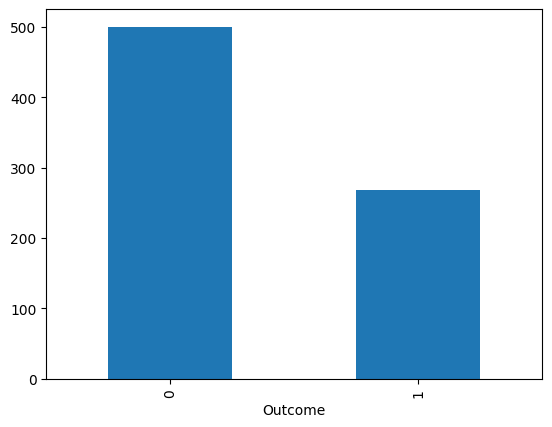

In [5]:
# if Outcome is 0 she/he is not diabetic, Outcome is 1 she/he is diabetic.
df['Outcome'].value_counts().plot.bar();

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)

### Stastmodel ile model kurulumu

In [8]:
log = sm.Logit(y, X)
log_model = log.fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                 0.05922
Time:                        22:25:05   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

### scikitlearn ile model kurulumu

In [9]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = 'liblinear')
log_model = log.fit(X,y)
log_model

LogisticRegression(solver='liblinear')

In [10]:
log_model.intercept_

array([-5.84073324])

In [11]:
log_model.coef_

array([[ 1.16937119e-01,  2.82506791e-02, -1.69647463e-02,
         7.64900753e-04, -6.30568264e-04,  5.91967766e-02,
         6.68475894e-01,  7.08845329e-03]])

## Tahmin ve Model Tuning

In [12]:
y_pred = log_model.predict(X)

In [13]:
# Karmasiklik matrix'i kullanarak dogruyken dogru olma, yanlisken dogru olma...
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [14]:
# Dogru siniflandirma orani
accuracy_score(y, y_pred)

0.7747395833333334

In [15]:
# Detayli ve duzenli bir sekilde cikti verir.
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [16]:
# Modelin ciktilari
log_model.predict(X)[:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [17]:
# Eger biz 1-0 seklinde degil de olasilik degerini istersek.
print('        1.sütun:0    2.sütun:1     olasılıklarını gosterıyor')
log_model.predict_proba(X)[:10]

        1.sütun:0    2.sütun:1     olasılıklarını gosterıyor


array([[0.35208919, 0.64791081],
       [0.91613598, 0.08386402],
       [0.22544273, 0.77455727],
       [0.92033572, 0.07966428],
       [0.16985872, 0.83014128],
       [0.79768782, 0.20231218],
       [0.8787278 , 0.1212722 ],
       [0.2764273 , 0.7235727 ],
       [0.32085978, 0.67914022],
       [0.9216265 , 0.0783735 ]])

**Modele manuel olarak Outcome 1 sececegi olasiligi giriyoruz.**

In [18]:
y_probs = log_model.predict_proba(X)[:,1] # Prob(Outcome = 1)
y_pred = [1 if i>0.5 else 0 for i in y_probs]

In [19]:
y_pred[:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [20]:
# Karmasiklik matrix'i kullanarak dogruyken dogru olma, yanlisken dogru olma...
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [21]:
# Dogru siniflandirma orani
accuracy_score(y, y_pred)

0.7747395833333334

In [22]:
# Detayli ve duzenli bir sekilde cikti verir.
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



**ROC egrisi degerlendirmesi yapiyoruz. Burada bilerek log_model.predict(X) seklinde bastan kurduk, yukarida bazi seyleri degistirdigimiz icin.**

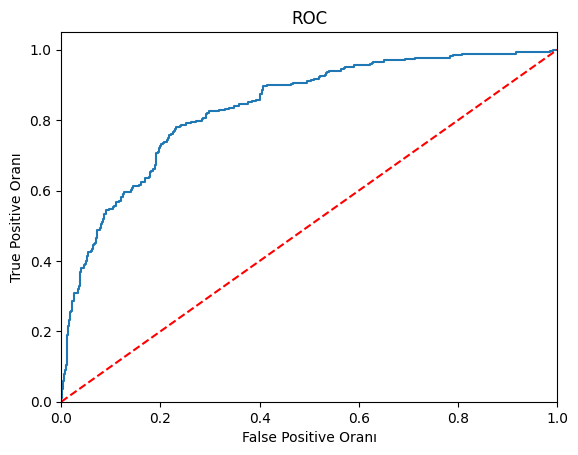

In [23]:
# ROC egrisi degerlendirmesi
logit_roc_auc = roc_auc_score(y, log_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

### Model Dogrulama ve Tuning

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Modeli bastan kuruyoruz.
log = LogisticRegression(solver='liblinear')
log_model = log.fit(X_train, y_train)
log_model

LogisticRegression(solver='liblinear')

In [25]:
accuracy_score(y_test, log_model.predict(X_test))

0.7447916666666666

In [26]:
# 10 katli capraz dogrulama yapalim ve bize 10 tane accuracy skoru versin. Bunun ortalamasini alip en dogru sonucu gosterelim.
# En dogru sonuc accuracy en yuksek sonuc demek degildir ! Daha once de deginmistik overfitting ile accuracyýi tavan yapabilirsin ama genellenebilirligi gider.
cross_val_score(log_model, X_test, y_test, cv=10).mean()

0.7397368421052632